In [1]:
import sys
import os
from itertools import product
import math
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from sklearn.manifold import TSNE, MDS
#import umap
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [2]:
def symmetrize(A):
    n = A.shape[0]
    B = A.copy()
    B[np.tril_indices(n)] = B.T[np.tril_indices(n)]
    return B

In [3]:
widths = 100*np.arange(1, 11)
depths = np.arange(1, 11)
seeds = np.arange(1, 5)

num_widths = len(widths)
num_depths = len(depths)
num_seeds = len(seeds)

In [4]:
filenames = os.listdir("distances/widthdepth/")
distnames = []
for filename in filenames:
    if filename.endswith("npy"):
        distnames.append(filename[:-4])
distnames = np.sort(distnames)

In [5]:
distnames

array(['lin_cka_dist', 'lin_cka_prime_dist', 'mean_cca_e2e',
       'mean_sq_cca_e2e', 'predictor_dist_0.0', 'predictor_dist_0.0001',
       'predictor_dist_0.001', 'predictor_dist_0.01',
       'predictor_dist_0.1', 'predictor_dist_1.0', 'predictor_dist_10.0',
       'predictor_dist_100.0', 'predictor_dist_1000.0',
       'predictor_dist_10000.0', 'predictor_dist_1e-05',
       'predictor_dist_1e-06', 'predictor_dist_1e-07',
       'predictor_dist_1e-08', 'predictor_dist_1e-09',
       'predictor_dist_1e-10', 'predictor_dist_1e-11',
       'predictor_dist_1e-12', 'predictor_dist_1e-13',
       'predictor_dist_1e-14', 'predictor_dist_1e-15',
       'predictor_dist_1e-16', 'predictor_dist_1e-17',
       'predictor_dist_1e-18', 'predictor_dist_1e-19',
       'predictor_dist_1e-20', 'procrustes', 'pwcca_dist_e2e'],
      dtype='<U22')

In [6]:
distnames = np.array(['lin_cka_dist',
             'lin_cka_prime_dist',
             'mean_cca_e2e',
             'mean_sq_cca_e2e',
             'procrustes',
             'pwcca_dist_e2e',
             'predictor_dist_0.0',
             'predictor_dist_1e-20',
             'predictor_dist_1e-19',
             'predictor_dist_1e-18',
             'predictor_dist_1e-17',
             'predictor_dist_1e-16',
             'predictor_dist_1e-15',
             'predictor_dist_1e-14',
             'predictor_dist_1e-13',
             'predictor_dist_1e-12',
             'predictor_dist_1e-11',
             'predictor_dist_1e-10',
             'predictor_dist_1e-09',
             'predictor_dist_1e-08',
             'predictor_dist_1e-07',
             'predictor_dist_1e-06',
             'predictor_dist_1e-05',
             'predictor_dist_0.0001',
             'predictor_dist_0.001',
             'predictor_dist_0.01',
             'predictor_dist_0.1',
             'predictor_dist_1.0',
             'predictor_dist_10.0',
             'predictor_dist_100.0',
             'predictor_dist_1000.0',
             'predictor_dist_10000.0'])

In [7]:
stats = np.load("distances/widthdepth/stats.npz")
model_names = stats["model_names"]
total_models = len(model_names)
dist_pairs_saved = stats["dist_pairs_saved"]

In [8]:
print(np.arange(total_models) - np.sum(dist_pairs_saved, axis=0))
print(np.arange(total_models) - np.flip(np.sum(dist_pairs_saved, axis=1)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [9]:
model_widths = []
model_depths = []
model_seeds = []
for name in model_names:
    splits = name.split("_")
    model_widths.append(int(splits[0][5:]))
    model_depths.append(int(splits[1][5:]))
    model_seeds.append(int(splits[2][4:]))
model_widths = np.array(model_widths)
model_depths = np.array(model_depths)
model_seeds = np.array(model_seeds)

sorted_inds = np.lexsort((model_widths, model_depths, model_seeds))

In [10]:
model_names[sorted_inds]

array(['width100_depth1_seed1', 'width200_depth1_seed1',
       'width300_depth1_seed1', 'width400_depth1_seed1',
       'width500_depth1_seed1', 'width600_depth1_seed1',
       'width700_depth1_seed1', 'width800_depth1_seed1',
       'width900_depth1_seed1', 'width1000_depth1_seed1',
       'width100_depth2_seed1', 'width200_depth2_seed1',
       'width300_depth2_seed1', 'width400_depth2_seed1',
       'width500_depth2_seed1', 'width600_depth2_seed1',
       'width700_depth2_seed1', 'width800_depth2_seed1',
       'width900_depth2_seed1', 'width1000_depth2_seed1',
       'width100_depth3_seed1', 'width200_depth3_seed1',
       'width300_depth3_seed1', 'width400_depth3_seed1',
       'width500_depth3_seed1', 'width600_depth3_seed1',
       'width700_depth3_seed1', 'width800_depth3_seed1',
       'width900_depth3_seed1', 'width1000_depth3_seed1',
       'width100_depth4_seed1', 'width200_depth4_seed1',
       'width300_depth4_seed1', 'width400_depth4_seed1',
       'width500_depth4_seed

In [11]:
sub_inds = np.where((np.array(model_depths)[sorted_inds] > 0) & (np.array(model_widths)[sorted_inds] > 0))[0]

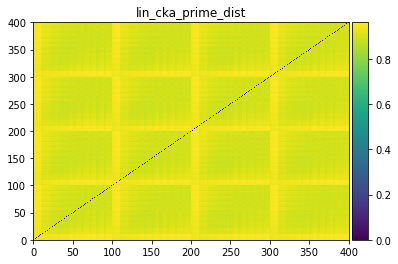

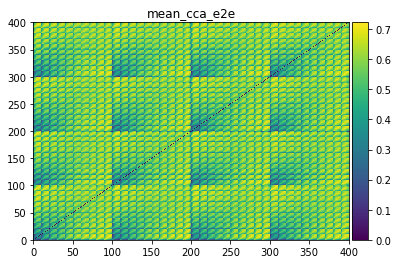

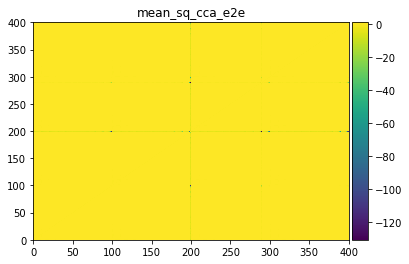

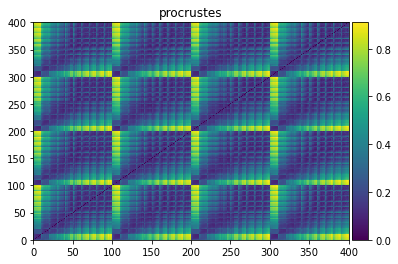

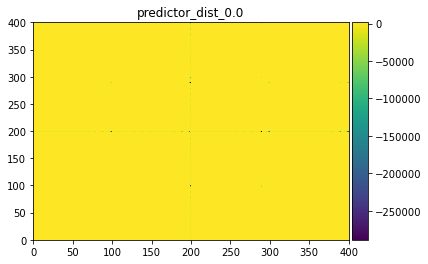

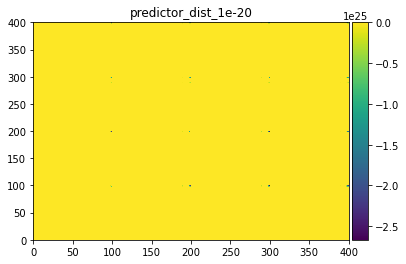

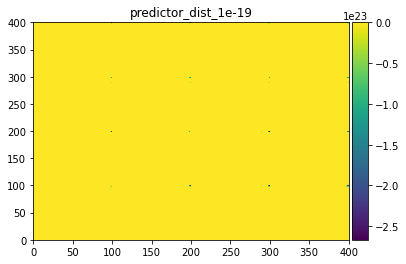

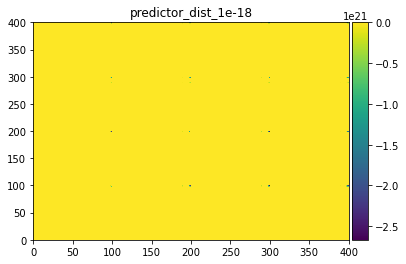

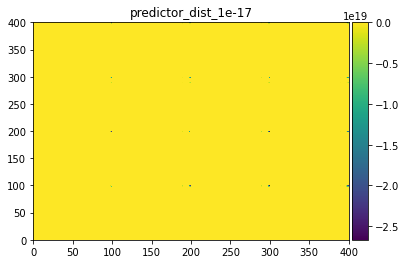

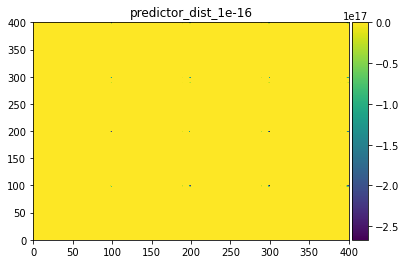

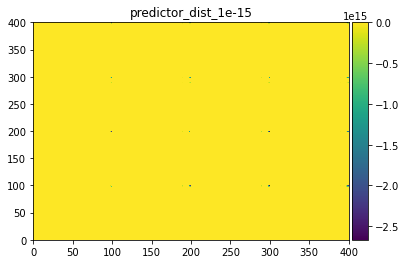

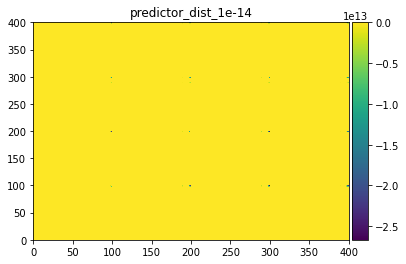

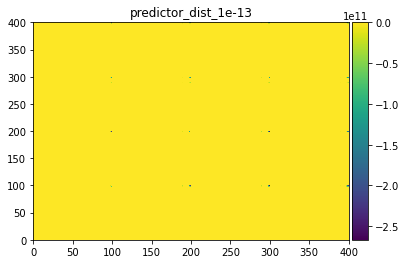

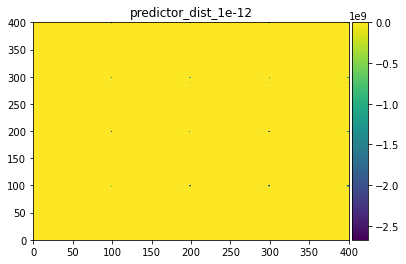

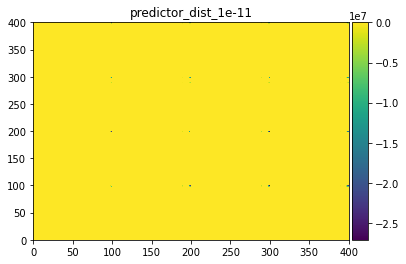

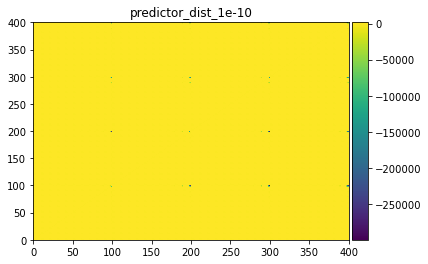

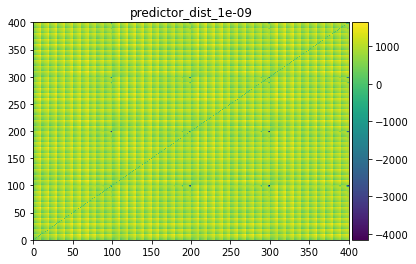

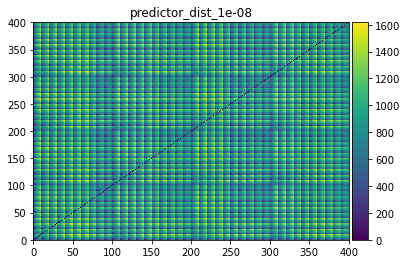

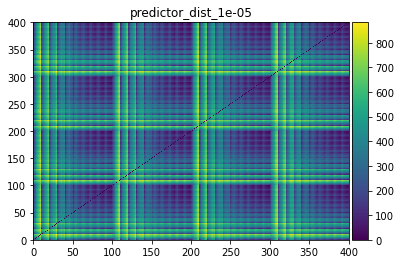

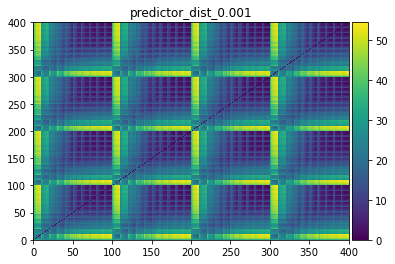

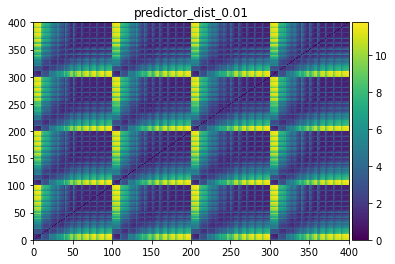

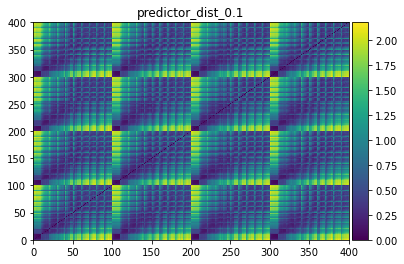

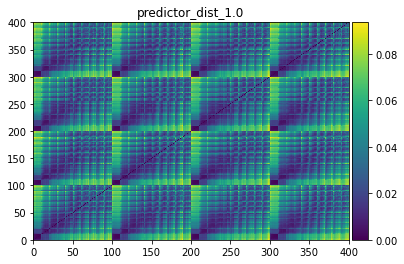

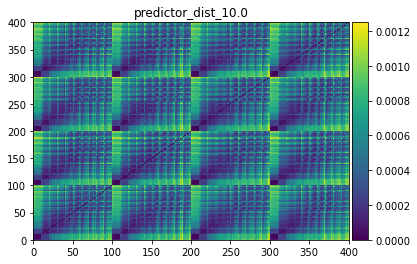

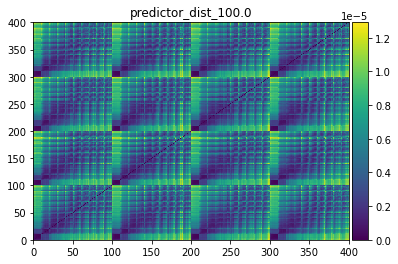

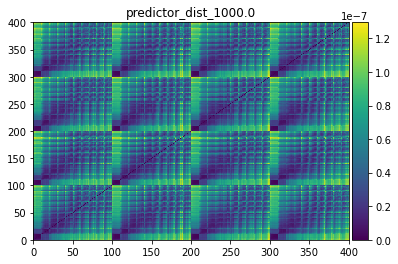

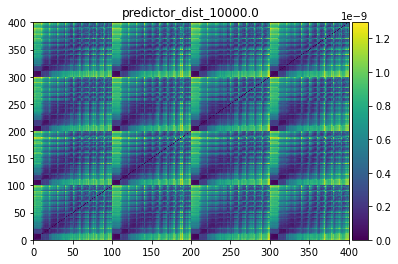

In [12]:
for distname in distnames:
    D = np.load(f'distances/widthdepth/{distname}.npy')
    D = np.reshape(D, [total_models, total_models])
    D = symmetrize(D)
    np.fill_diagonal(D, 0)
    D = D[sorted_inds][:, sorted_inds]

    fig, ax = plt.subplots()
    im = ax.pcolormesh(D)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    ax.set_title(distname)
    plt.show()

In [13]:
chosen_widths = widths[widths > 0]
idx_widths = np.in1d(model_widths, chosen_widths)
sub_widths = model_widths[idx_widths]
sub_num_widths = len(chosen_widths)

chosen_depths = depths[depths > 0]
idx_depths = np.in1d(model_depths, chosen_depths)
sub_depths = model_depths[idx_depths]
sub_num_depths = len(chosen_depths)

sub_idx = idx_widths & idx_depths
sub_inds = np.where(sub_idx)[0]
sub_num_models = np.sum(sub_idx)

In [14]:
num_dists = len(distnames)
D_aves = np.zeros((sub_num_widths*sub_num_depths, sub_num_widths*sub_num_depths, num_dists))
for k in range(num_dists):
    D = np.load(f'distances/widthdepth/{distnames[k]}.npy')
    D = np.reshape(D, [total_models, total_models])
    D = symmetrize(D)
    np.fill_diagonal(D, 0)
    
    D[~sub_idx] = np.nan
    D[:, ~sub_idx] = np.nan
    D = D[sorted_inds][:, sorted_inds]
    D_ave = np.zeros((num_widths*num_depths, num_widths*num_depths))
    for i in range(num_seeds):
        for j in range(num_seeds):
            Dij = D[i*num_widths*num_depths:(i+1)*num_widths*num_depths, j*num_widths*num_depths:(j+1)*num_widths*num_depths]
            D_ave += Dij
    counts = num_seeds**2 * np.ones((num_widths*num_depths, num_widths*num_depths))
    np.fill_diagonal(counts, num_seeds*(num_seeds-1))
    D_ave = D_ave / counts      
    D_ave = D_ave[~np.isnan(D_ave)].reshape((sub_num_widths*sub_num_depths, sub_num_widths*sub_num_depths))
    
    D_aves[:, :, k] = D_ave

In [15]:
embed_type = "MDS"

num_dists = len(distnames)

embeddings = np.zeros((num_dists, sub_num_models, 2))
for i in range(num_dists):
    print(f"Computed {distnames[i]}")
    D = np.load(f'distances/widthdepth/{distnames[i]}.npy')
    D = np.reshape(D, [total_models, total_models])
    D = symmetrize(D)
    np.fill_diagonal(D, 0)
    D = D[sub_inds][:, sub_inds]
    
    if np.any(D < 0):
        embeddings[i, :, :] = np.nan
        print("isnan")
        continue

    if embed_type == "TSNE":
        X_embedded = TSNE(n_components=2, perplexity=20.0, init="random", metric="precomputed").fit_transform(D)
    elif embed_type == "UMAP":
        X_embedded = umap.UMAP(n_components=2, n_neighbors=20, min_dist=0.1).fit_transform(np.sqrt(D))
    elif embed_type == "MDS":
        X_embedded = MDS(n_components=2, dissimilarity="precomputed").fit_transform(np.sqrt(D))

    embeddings[i, :, :] = X_embedded

Computed lin_cka_dist
Computed lin_cka_prime_dist
Computed mean_cca_e2e
Computed mean_sq_cca_e2e
isnan
Computed procrustes
Computed pwcca_dist_e2e
isnan
Computed predictor_dist_0.0
isnan
Computed predictor_dist_1e-20
isnan
Computed predictor_dist_1e-19
isnan
Computed predictor_dist_1e-18
isnan
Computed predictor_dist_1e-17
isnan
Computed predictor_dist_1e-16
isnan
Computed predictor_dist_1e-15
isnan
Computed predictor_dist_1e-14
isnan
Computed predictor_dist_1e-13
isnan
Computed predictor_dist_1e-12
isnan
Computed predictor_dist_1e-11
isnan
Computed predictor_dist_1e-10
isnan
Computed predictor_dist_1e-09
isnan
Computed predictor_dist_1e-08
Computed predictor_dist_1e-07
Computed predictor_dist_1e-06
Computed predictor_dist_1e-05
Computed predictor_dist_0.0001
Computed predictor_dist_0.001
Computed predictor_dist_0.01
Computed predictor_dist_0.1
Computed predictor_dist_1.0
Computed predictor_dist_10.0
Computed predictor_dist_100.0
Computed predictor_dist_1000.0
Computed predictor_dist_1

## MNIST width-depth embedding plots

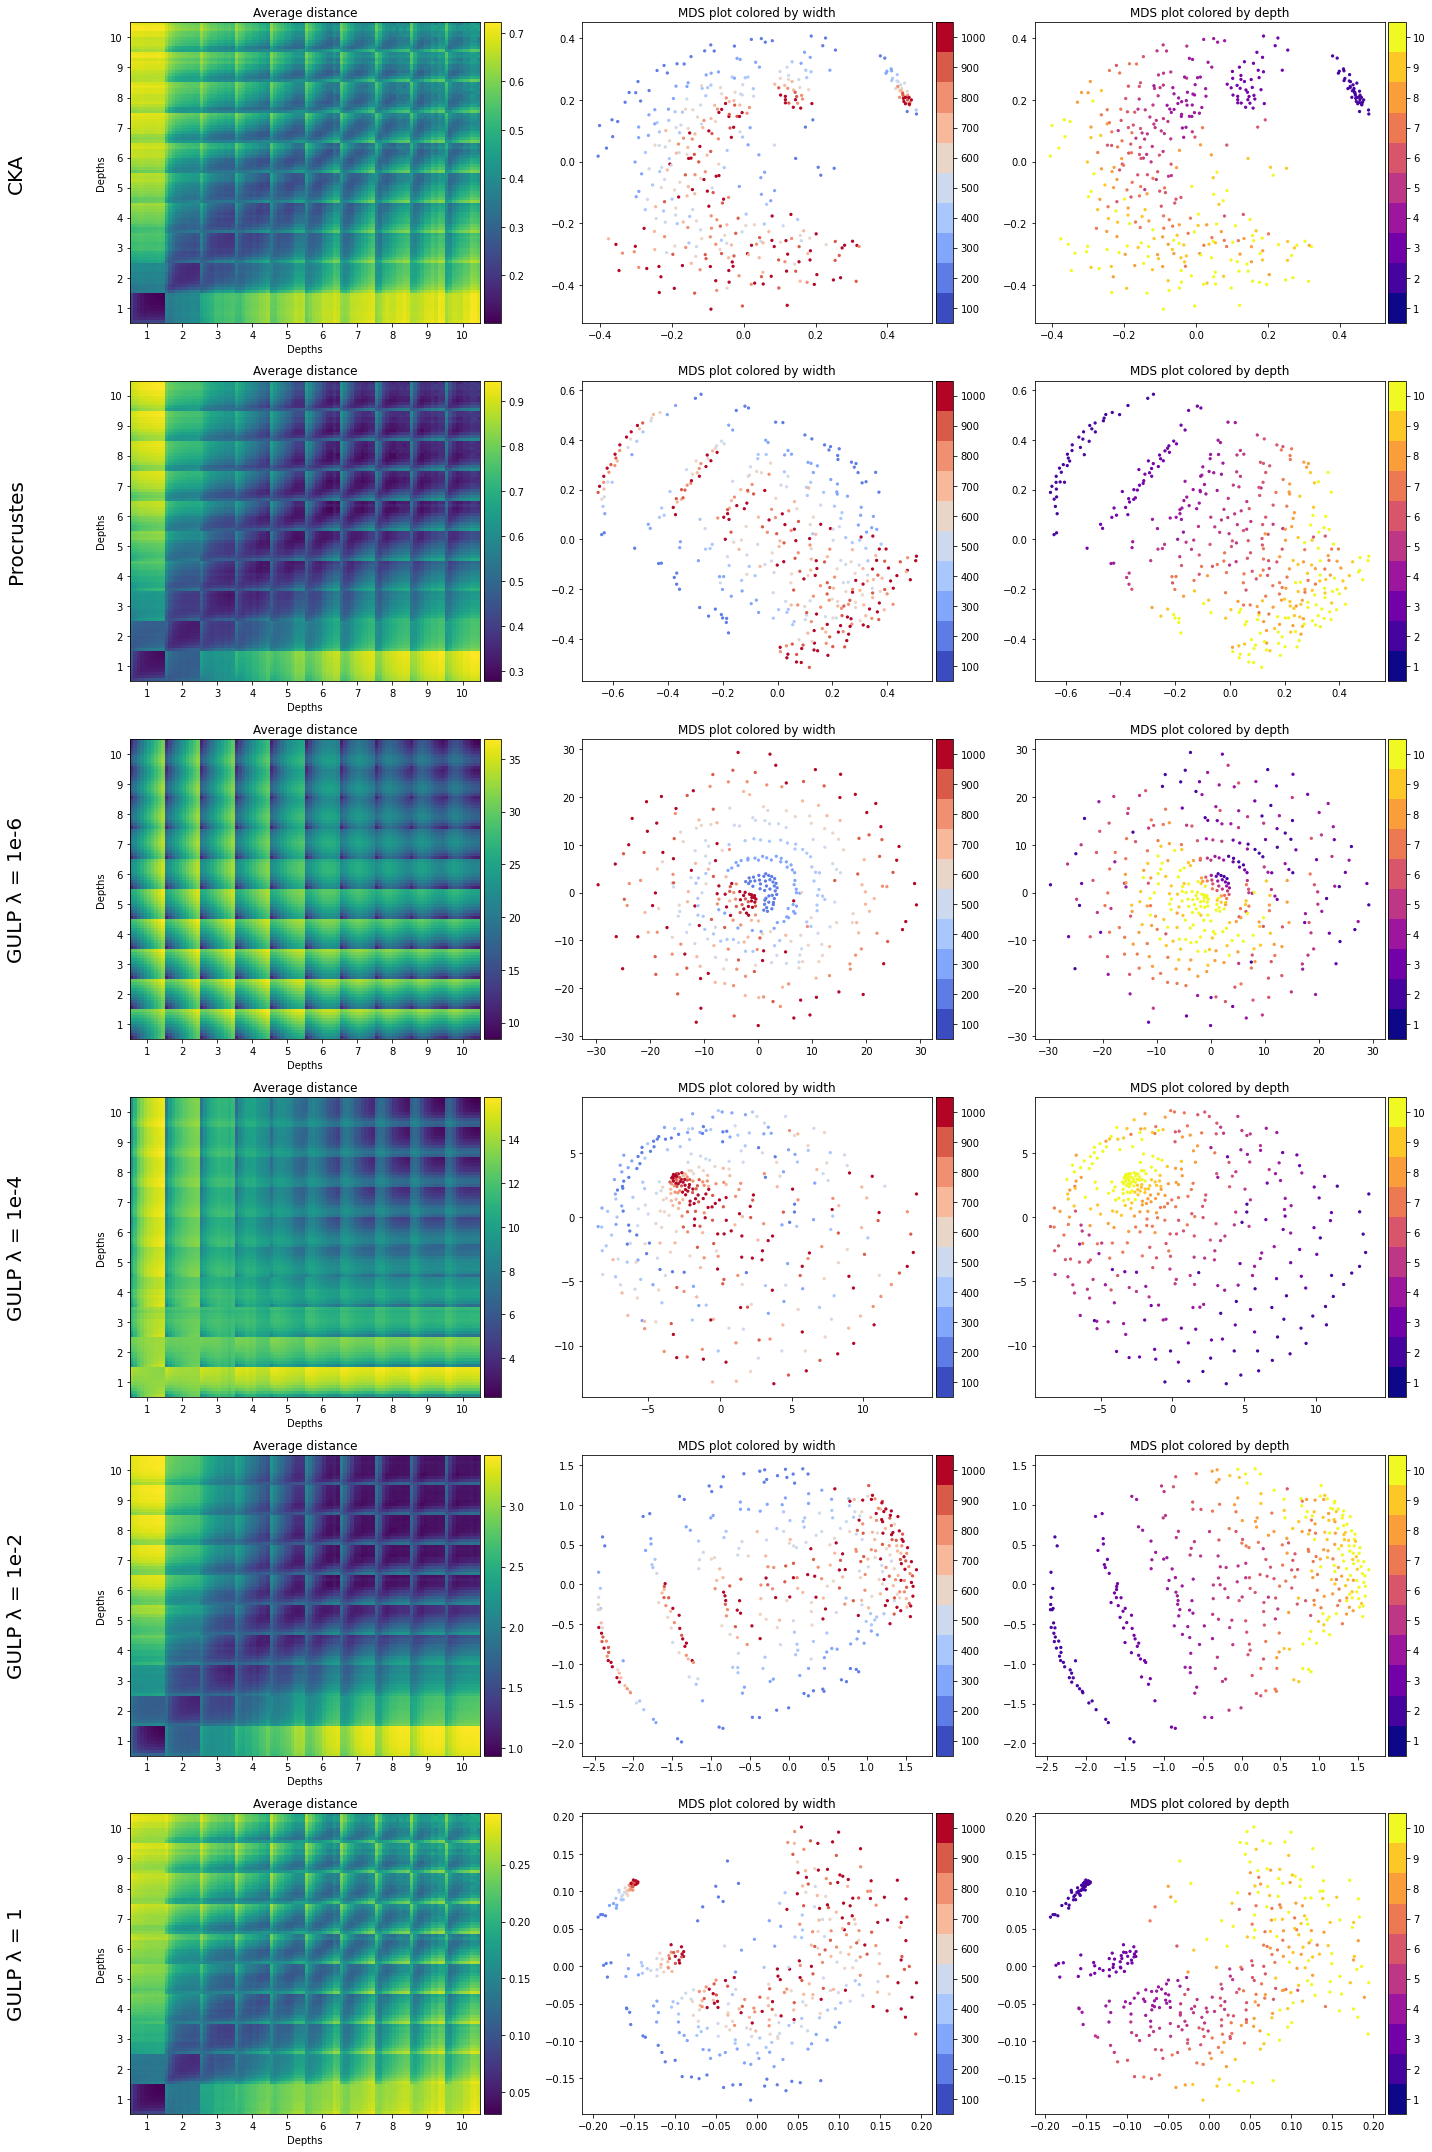

In [18]:
dist_inds = [0, 4, 21, 23, 25, 27]

labels = ['CKA', 'Procrustes', 'GULP λ = 1e-6', 'GULP λ = 1e-4', 'GULP λ = 1e-2', 'GULP λ = 1']
#labels = distnames[dist_inds]

cmap_width = cm.get_cmap("coolwarm")
cmaplist_width = [cmap_width(i) for i in range(cmap_width.N)]
cmap_width = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist_width, cmap_width.N)
norm_width = mpl.colors.BoundaryNorm(np.arange(len(chosen_widths)+1), cmap_width.N)

cmap_depth = cm.get_cmap("plasma")
cmaplist_depth = [cmap_depth(i) for i in range(cmap_depth.N)]
cmap_depth = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist_depth, cmap_depth.N)
norm_depth = mpl.colors.BoundaryNorm(np.arange(len(chosen_depths)+1), cmap_depth.N)

fig, axs = plt.subplots(len(dist_inds), 4, figsize=(20, 30), gridspec_kw={'width_ratios': [1, 20, 20, 20]})
for i in range(len(dist_inds)):
    ax = axs[i, 0]
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_ylabel(labels[i], fontsize=20)
    
    ax = axs[i, 1]
    im = ax.pcolormesh(np.sqrt(D_aves[:, :, dist_inds[i]]))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    ax.set_title(f"Average distance")
    ax.set_yticks(np.linspace(sub_num_widths/2, sub_num_widths*(sub_num_depths-1/2), sub_num_depths))
    ax.set_yticklabels(chosen_depths)
    ax.set_ylabel("Depths")
    ax.set_xticks(np.linspace(sub_num_widths/2, sub_num_widths*(sub_num_depths-1/2), sub_num_depths))
    ax.set_xticklabels(chosen_depths)
    ax.set_xlabel("Depths")
    
    X_embedded = embeddings[dist_inds[i], :, :]

    ax = axs[i, 2]
    sc = ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=model_widths[sub_inds]/100, s=5, cmap=cmap_width, norm=norm_width)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(sc, cax=cax, orientation='vertical', ticks=mpl.ticker.FixedLocator(np.arange(len(chosen_widths))+0.5))
    cbar.ax.set_yticklabels(chosen_widths)
    ax.set_title(f'{embed_type} plot colored by width')
    
    ax = axs[i, 3]
    sc = ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=model_depths[sub_inds], s=5, cmap=cmap_depth, norm=norm_depth)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(sc, cax=cax, orientation='vertical', ticks=mpl.ticker.FixedLocator(np.arange(len(chosen_depths))+0.5))
    cbar.ax.set_yticklabels(chosen_depths)
    ax.set_title(f'{embed_type} plot colored by depth')
fig.tight_layout()
plt.savefig("../paper_figures/mnist_width_depth.pdf")
plt.show()

In [19]:
dist_inds = [0, 4, 21, 25, 27]

labels = ['CKA', 'Procrustes', 'GULP λ = 1e-6', 'GULP λ = 1e-2', 'GULP λ = 1']

cmap_width = cm.get_cmap("coolwarm")
cmaplist_width = [cmap_width(i) for i in range(cmap_width.N)]
cmap_width = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist_width, cmap_width.N)
norm_width = mpl.colors.BoundaryNorm(np.arange(len(chosen_widths)+1), cmap_width.N)

cmap_depth = cm.get_cmap("plasma")
cmaplist_depth = [cmap_depth(i) for i in range(cmap_depth.N)]
cmap_depth = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist_depth, cmap_depth.N)
norm_depth = mpl.colors.BoundaryNorm(np.arange(len(chosen_depths)+1), cmap_depth.N)

fig, axs = plt.subplots(3, len(dist_inds), figsize=(24, 8), gridspec_kw={'height_ratios': [1, 20, 20]})
for i in range(len(dist_inds)):
    ax = axs[0, i]
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_title(labels[i], fontsize=25)
    
    X_embedded = embeddings[dist_inds[i], :, :]

    ax = axs[1, i]
    sc = ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=model_widths[sub_inds]/100, s=5, cmap=cmap_width, norm=norm_width)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(sc, cax=cax, orientation='vertical', ticks=mpl.ticker.FixedLocator(np.arange(len(chosen_widths))+0.5))
    cbar.ax.set_yticklabels(chosen_widths)
    ax.set_title(f'{embed_type} plot colored by width')
    
    ax = axs[2, i]
    sc = ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=model_depths[sub_inds], s=5, cmap=cmap_depth, norm=norm_depth)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(sc, cax=cax, orientation='vertical', ticks=mpl.ticker.FixedLocator(np.arange(len(chosen_depths))+0.5))
    cbar.ax.set_yticklabels(chosen_depths)
    ax.set_title(f'{embed_type} plot colored by depth')
fig.tight_layout()
plt.savefig("../paper_figures/mnist_width_depth_small.pdf", bbox_inches='tight')
plt.show()